In [1]:
import os
import chars2vec
import sklearn.decomposition
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import pandas as pd
import re

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## INSPIRATION
https://hackernoon.com/chars2vec-character-based-language-model-for-handling-real-world-texts-with-spelling-errors-and-a3e4053a147d

## FUNCTIONS AND GLOBALS

In [2]:
stemmer = SnowballStemmer('english')
stopwords_eng = stopwords.words('english')

In [3]:
def text_reader(file):
    with open(file, 'r') as fp:
        return fp.read()
    
def stem_clean_stopwords_doc(doc):
    word_list = word_tokenize(doc)
    word_list = [wd.replace('.', '').replace('!', '').replace('?','').replace(',','') for wd in word_list if not wd in stopwords_eng]
    return [stemmer.stem(wd) for wd in word_list]

## LOAD AND CLEAN TEXT

In [4]:
folder = "/home/kapronczaym/chars_2_vec/text"

In [5]:
txts = [f for f in os.listdir(folder) if f.endswith('.txt')]

In [6]:
texts = [text_reader('/'.join([folder, txt])) for txt in txts]

In [7]:
cleaned_texts = [stem_clean_stopwords_doc(text) for text in texts]

## CHARS_2_VEC

#### INITIALIZE MODEL

In [8]:
c2v_model = chars2vec.load_model('eng_100')

#### CREATE EMBEDDING

In [9]:
words = cleaned_texts[0]
words = list(dict.fromkeys(words))
regex = re.compile("^[a-zA-Z]+$")
words = [f for f in words if regex.match(f)]
word_embeddings = c2v_model.vectorize_words(words)

#### 2D PROJECTION

In [10]:
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

#### VISUALIZE

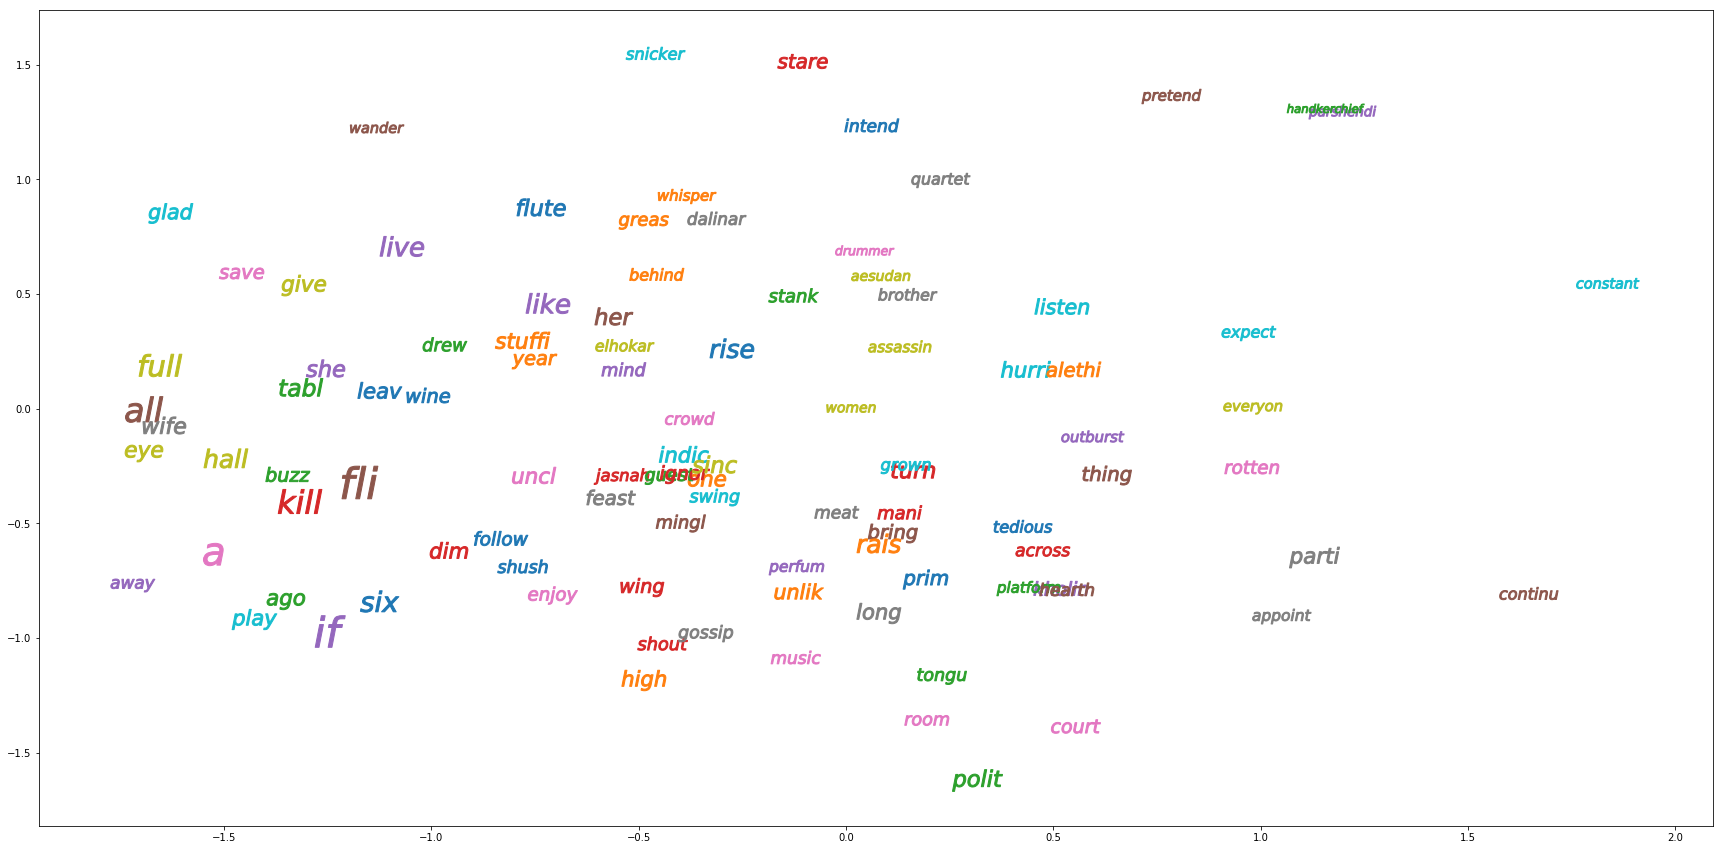

In [11]:
n = 100 # how many words to plot

f = plt.figure(figsize=(30,15))
for j in range(n):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j)

plt.show()

## FIND POTENTIAL TYPOS

In [12]:
word_embeddings.shape

(7882, 100)

In [13]:
similarities = cosine_similarity(word_embeddings)

In [16]:
df_sim = pd.DataFrame(similarities)
pot_typo = {col: df_sim[col][((df_sim[col] > 0.9) & (df_sim[col] < 1.0))].index for col in df_sim.columns}

In [17]:
pot_typo_words = {words[key]: [words[val] for val in value] for key, value in pot_typo.items()}

In [18]:
pot_typo_words

{'six': [],
 'year': ['year'],
 'ago': [],
 'jasnah': [],
 'kholin': [],
 'pretend': [],
 'enjoy': [],
 'parti': ['parti', 'partit'],
 'give': ['give', 'given'],
 'indic': ['indic'],
 'intend': ['intend'],
 'one': ['zone'],
 'guest': ['guest', 'guess'],
 'kill': [],
 'she': ['she'],
 'wander': [],
 'crowd': [],
 'feast': ['feast'],
 'hall': ['hall'],
 'listen': ['glisten', 'slightest', 'lighten'],
 'wine': [],
 'greas': ['grass'],
 'tongu': ['tongu'],
 'dim': [],
 'mind': ['mind', 'mine'],
 'her': ['hear'],
 'uncl': [],
 'dalinar': ['dalinar'],
 'full': ['full'],
 'swing': ['swing', 'wing', 'sign', 'sing', 'swig'],
 'rise': ['risen'],
 'high': [],
 'tabl': ['tall', 'tabul'],
 'shout': ['shoot'],
 'parshendi': ['pyramid'],
 'bring': ['bring', 'ring'],
 'drummer': ['drummer'],
 'brother': ['brother'],
 'elhokar': [],
 'hurri': [],
 'shush': ['shush'],
 'alethi': [],
 'polit': ['polit', 'posit'],
 'ignor': ['ignor'],
 'outburst': ['outburst', 'tourniquet'],
 'all': ['ball'],
 'save': [],
